# 雷达点云数据的处理
----
先读取雷达点云的.csv 文件，包括读取各个属性的名字和数据。

In [1]:
with open("./data/5barrel.csv","r") as barrel_file:
    lidar_data=barrel_file.readlines()
    lidar_featuresnames=lidar_data[0][:-1].split(",")
    lidar_data=[point[:-1].split(",") for point in lidar_data[1:]]
for i in range(len(lidar_data)):
    lidar_data[i]=[float(feature) for feature in lidar_data[i]]

雷达数据的主要包括：3维坐标，强度，激光id ，方位角，距离，修正后的时间，时间戳

In [2]:
lidar_featuresnames

['"Points_m_XYZ:0"',
 '"Points_m_XYZ:1"',
 '"Points_m_XYZ:2"',
 '"intensity"',
 '"laser_id"',
 '"azimuth"',
 '"distance_m"',
 '"adjustedtime"',
 '"timestamp"']

In [3]:
lidar_data[0]

[0.2022193074226379,
 1.557002425193787,
 -0.1767785996198654,
 2.0,
 1.0,
 740.0,
 1.58,
 874498537.0,
 874498537.0]

使用 matplotlib 绘制雷达的3D 图以及3视图

Populating the interactive namespace from numpy and matplotlib


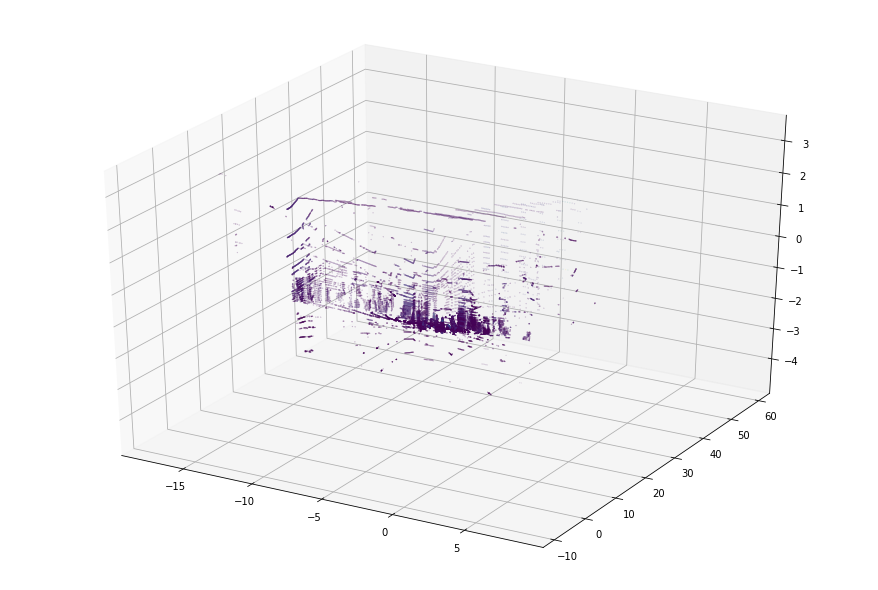

In [9]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np  
%pylab inline
def draw_3D(lidar_data):
    lidar_feature_x=[feature[0] for feature in lidar_data]
    lidar_feature_y=[feature[1] for feature in lidar_data]
    lidar_feature_z=[feature[2] for feature in lidar_data]
    lidar_feature_intensity=[feature[3] for feature in lidar_data]
    fig1 = plt.figure(num="3维视图",figsize=(12,8))
    ax = Axes3D(fig1)
    ax.scatter(lidar_feature_x, lidar_feature_y, lidar_feature_z, c=lidar_feature_intensity, marker='.', s=20, label='')
    plt.show()
def draw_2D(lidar_data):
    lidar_feature_x=[feature[0] for feature in lidar_data]
    lidar_feature_y=[feature[1] for feature in lidar_data]
    lidar_feature_z=[feature[2] for feature in lidar_data]
    lidar_feature_intensity=[feature[3] for feature in lidar_data]
    fig2,axes2=plt.subplots(1,3,figsize=(18,8))  
    axes2[0].scatter(lidar_feature_x,lidar_feature_y,c=lidar_feature_intensity,marker=".",s=20, label='1') 
    axes2[1].scatter(lidar_feature_x,lidar_feature_z,c=lidar_feature_intensity,marker=".",s=20, label='2')  
    axes2[2].scatter(lidar_feature_y,lidar_feature_z,c=lidar_feature_intensity,marker=".",s=20, label='3') 
    plt.show()
draw_3D(lidar_data)

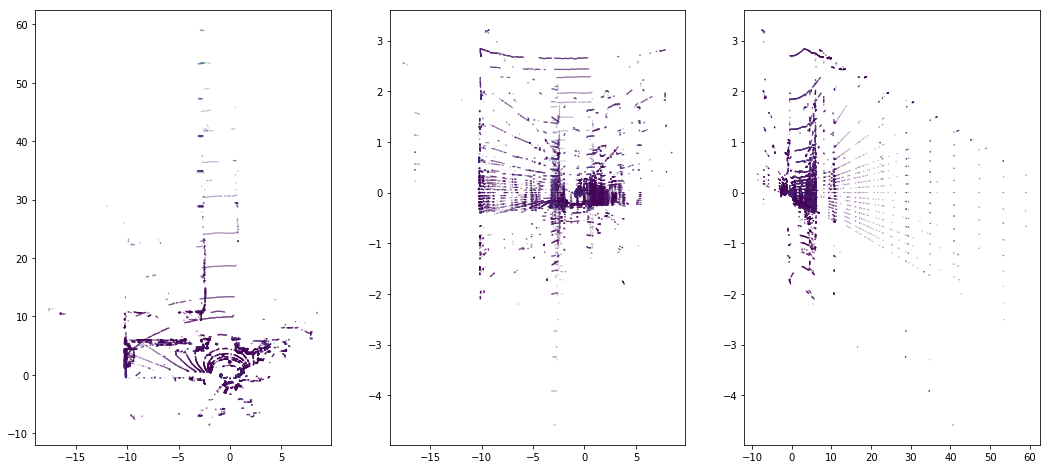

In [10]:
draw_2D(lidar_data)

通过可视化可以发现雷达点云稍显杂乱，此处运用滤波算法对数据进行预处理。
首先，我们关注较多的是前方，以及距离地面1米一下的数据。

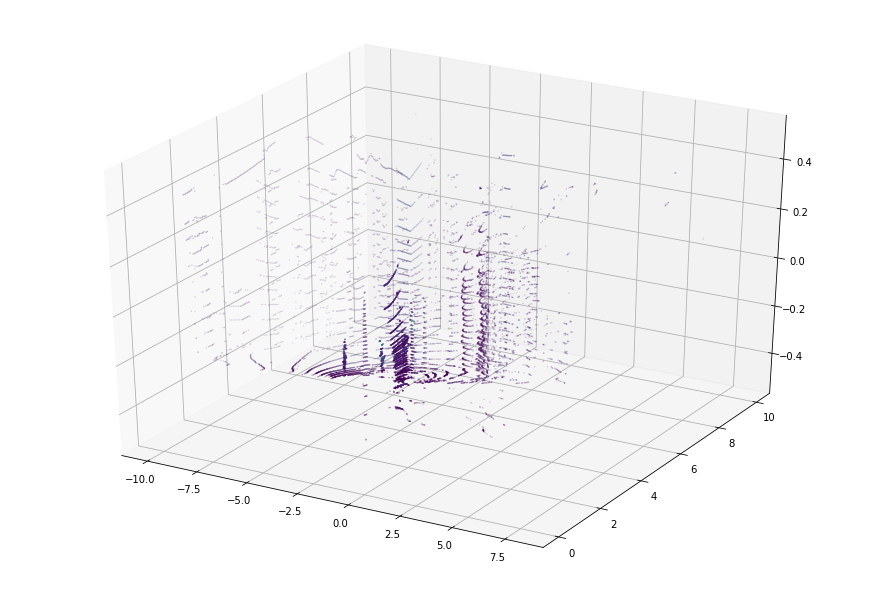

In [34]:
lidar_filter1_data=[]
for point in lidar_data:
    if point[0]<10 and point[0]>-10 and point[1]>0 and point[1]<10 and point[2]<0.5 and point[2]>-0.5:
        lidar_filter1_data.append(point)
draw_3D(lidar_filter1_data)

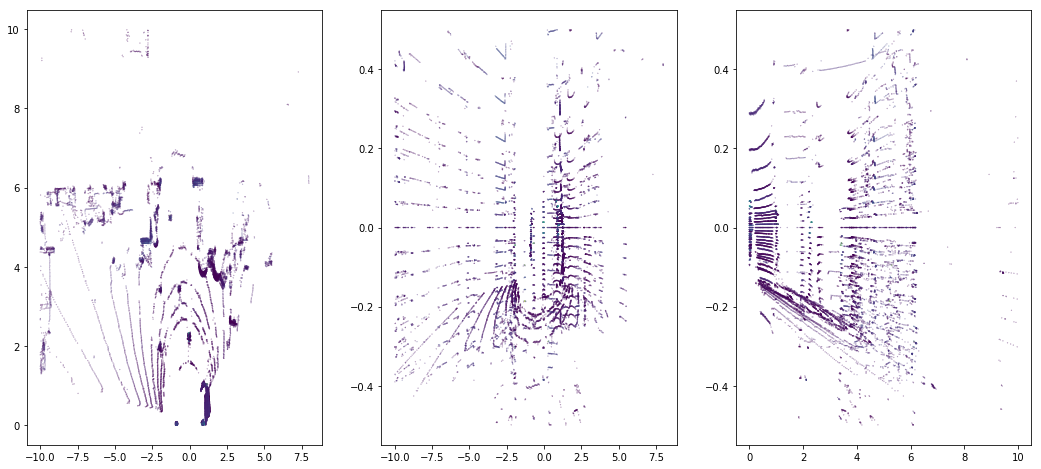

In [35]:
draw_2D(lidar_filter1_data)

经过直通过滤后仍然存在孤立点，为消除孤立点，使用半径滤波再进行处理。即以该店为球心，如果半径0.1 米内点的数量小于5，则滤除该点。

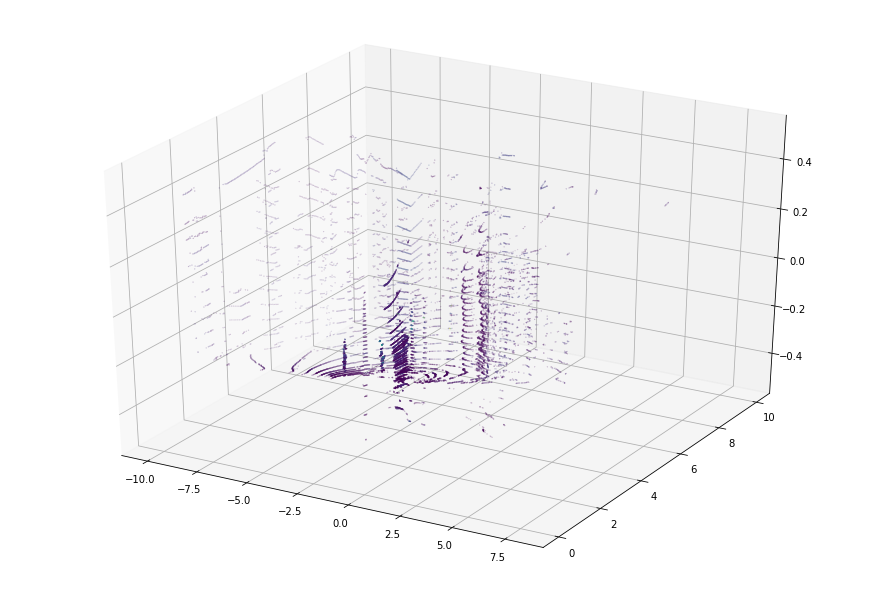

In [36]:
def distance2(A,B):
    return np.sum(np.square(np.array(A[:3])-np.array(B[:3])))
lidar_filter2_data=[]
for point in lidar_filter1_data:
    nearpointnum=0
    for other_point in lidar_filter1_data:
        if distance2(point,other_point)<0.1:
            nearpointnum+=1
        if nearpointnum>10:
            break
    if nearpointnum>5:
        lidar_filter2_data.append(point)
draw_3D(lidar_filter2_data)

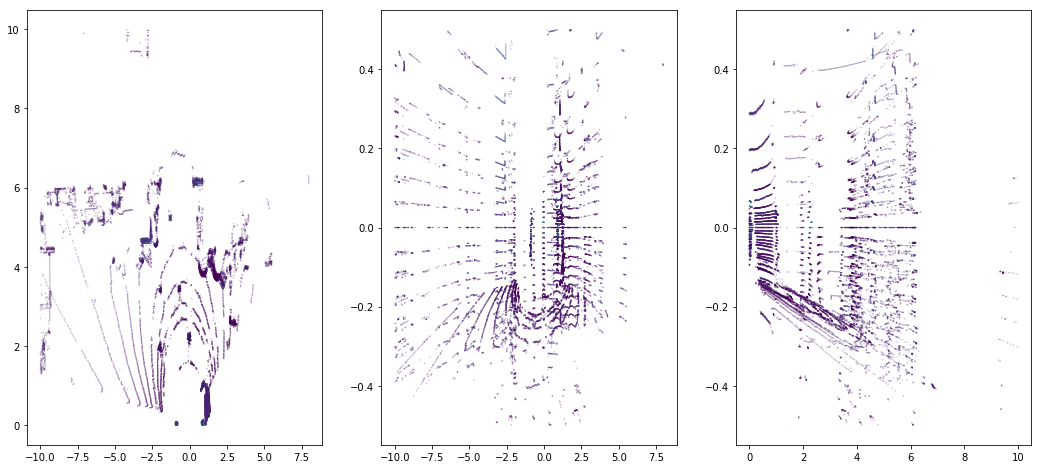

In [37]:
draw_2D(lidar_filter2_data)

In [39]:
len(lidar_filter2_data)

17981

使用K-means 聚类算法求聚类中心

In [1]:
from sklearn.cluster import KMeans
kmeans_data=[point[:3] for point in lidar_filter2_data]
estimator = KMeans(n_clusters=20)#构造聚类器
estimator.fit(kmeans_data)#聚类
label_pred = estimator.labels_ #获取聚类标签
centroids = estimator.cluster_centers_ #获取聚类中心
inertia = estimator.inertia_ # 获取聚类准则的总和

NameError: name 'lidar_filter2_data' is not defined

In [68]:
centroids

array([[ 4.64898099e-01,  6.06608235e+00, -4.76727015e-02],
       [-3.53465665e+00,  1.42846666e+00, -1.96632743e-01],
       [ 1.15000451e+00,  5.63038526e-01, -7.77446439e-04],
       [-9.31145081e+00,  5.15343540e+00,  7.96661998e-03],
       [-2.80496289e+00,  4.56017189e+00, -6.44896184e-02],
       [ 2.00816165e+00,  3.78704877e+00, -6.25383346e-02],
       [-7.09735630e+00,  5.43211638e+00, -1.15789095e-02],
       [-2.04187005e+00,  1.46526699e+00, -1.59494286e-01],
       [-3.30201368e+00,  9.56832663e+00, -1.42688423e-01],
       [-1.17609006e+00,  3.35150329e+00, -2.12686169e-01],
       [-9.54465564e-01,  6.04640629e-02, -3.91244421e-02],
       [ 1.86286955e-01,  2.28742951e+00, -1.50489900e-01],
       [-2.03420998e+00,  5.75324607e+00, -9.46757092e-02],
       [ 3.45391940e+00,  4.43289636e+00,  3.33846771e-02],
       [-9.53761775e+00,  2.32309724e+00,  1.17356131e-02],
       [-5.05507811e+00,  5.61784002e+00, -2.52562498e-02],
       [-5.22350647e+00,  2.99660708e+00

In [69]:
label_pred

array([11,  0,  0, ..., 11, 17, 17])

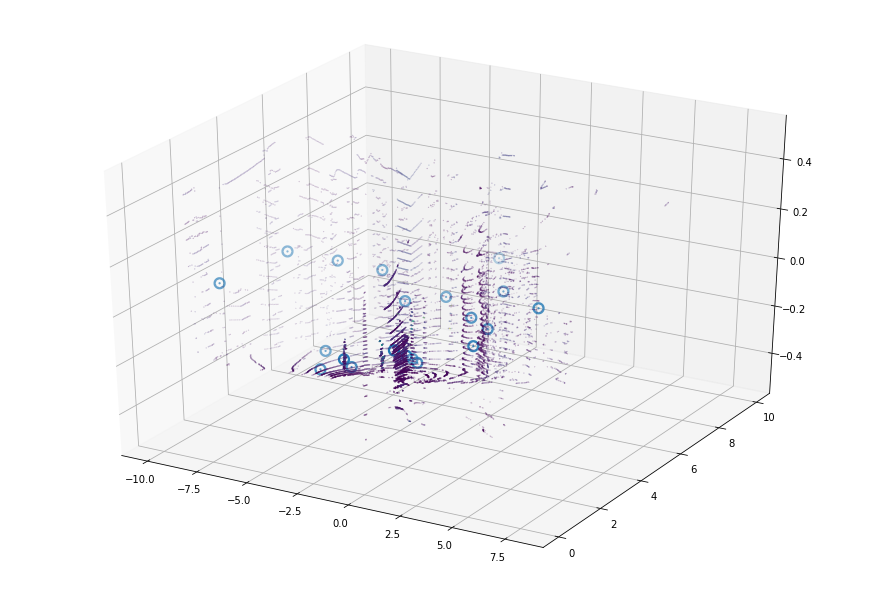

In [73]:
lidar_feature_x=[feature[0] for feature in lidar_filter2_data]
lidar_feature_y=[feature[1] for feature in lidar_filter2_data]
lidar_feature_z=[feature[2] for feature in lidar_filter2_data]
lidar_feature_intensity=[feature[3] for feature in lidar_filter2_data]
fig1 = plt.figure(num="3维视图",figsize=(12,8))
ax = Axes3D(fig1)
ax.scatter(lidar_feature_x, lidar_feature_y, lidar_feature_z, c=lidar_feature_intensity, marker='.', s=0.1, label='')
center_matrix_x=[point[0] for point in centroids]
center_matrix_y=[point[1] for point in centroids]
center_matrix_z=[point[2] for point in centroids]
ax.scatter(center_matrix_x,center_matrix_y,center_matrix_z,marker=".",s=20,linewidth=10)
plt.show()

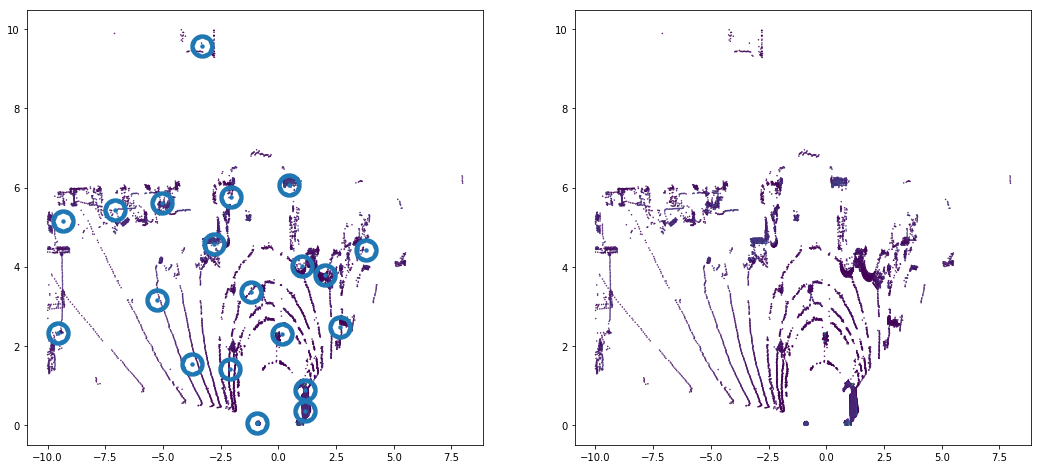

In [74]:
fig2,axes2=plt.subplots(1,2,figsize=(18,8))  
axes2[0].scatter(lidar_feature_x,lidar_feature_y,c=lidar_feature_intensity,marker=".",s=1, label='1',linewidth=1)
axes2[0].scatter(center_matrix_x,center_matrix_y,marker="o",s=20,linewidth=20)
axes2[1].scatter(lidar_feature_x,lidar_feature_y,c=lidar_feature_intensity,marker=".",s=1, label='1',linewidth=1)
plt.show()